# Verbs

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from collections import Counter
from string import punctuation
from spacy import displacy

In [2]:
def read_spells(read_path,save_path=None):
    df = pd.read_csv(read_path, sep=",")
    df.rename(columns={'Dónde se compró': 'Procedencia', 'Datos adicionales': 'Información'}, inplace=True)
    df.drop(columns=["Otras versiones"],inplace=True)
    return df


In [3]:
df = read_spells("/Users/roicort/Documents/GitHub/HumanidadesDigitales/DarkAnalysis/NLP/corpus.csv")

In [4]:
df

,Id,Título,Oración,Objeto,Procedencia,Medidas,Información,Voz
0,1,Legítimo polvo Sándalo,NaN,Polvo blanco,"Mercado de Catemaco, Veracruz (2008)",9 x 6 cm,Instrucciones: “Acostumbre usar diariamente es...,NaN
1,2,MARAVILLOSO POLVO DEL CONGO,NaN,Polvo blanco,Mercado de Catemaco (2008),9 x 6 cm,"“RETIRA SALACIONES EN EL NEGOCIO, TRABAJO Y HO...",NaN
2,3,LEGÍTIMO POLVO DOBLEGADO A MIS PIES [ver #51],NaN,Polvo blanco,Mercado de Catemaco (2008),9 x 6 cm,"“Este polvo tiene propiedades ocultas, la muje...","mujer, para la"
3,4,POLVO DE OLICORNIO VFNCEDOR [sic],NaN,Polvo gris claro,Mercado de Catemaco (2008),9 x 6 cm,“Legítimo Polvo VENCEDOR úselo polveándose”,NaN
4,5,Polvo especial SIEMPRE CONMIGO,NaN,Polvo blanco,Mercado de Catemaco (2008),9 x 6 cm,USELO POLVEANDOSE TODO EL CUERPO,NaN
...,...,...,...,...,...,...,...,...
140,140,LEGITIMO POLVO DE Llama Cliente,NaN,Polvo gris claro,Mercado Independencia de Morelia (2016),NaN,LEGITIMO POLVO DE LLAMA CLIENTE [ilegible],NaN
141,141,MARAVILLOSO POLVO CONGO,NaN,Polvo gris,Mercado Independencia de Morelia (2016),NaN,"RETIRA SALACIONES EN EL NEGOCIO, TRABAJO Y HOG...",NaN
142,142,Polvo Divina Providencia,A ti excelsa trinidad mi memoria y voluntad a ...,Polvo gris claro,NaN,NaN,NaN,NaN
143,143,LEGITIMO POLVO DE LAS CUATRO MAGIAS,NaN,Polvo gris claro,NaN,NaN,LEGITIMO POLVO DE LAS CUATRO MAGIAS Líbrame ...,NaN


In [5]:
nlp = spacy.load("es_core_news_md")
text = df.iloc[7]["Oración"].replace("\n"," ")
print(text)
# Process whole documents
doc = nlp(text)
print("\n")

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

print("\n") 
# Analyze syntax
print("Nouns:", [chunk.text for chunk in doc.noun_chunks])
print("\n")
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])
print("\n")

ORACION A SAN ALEJO San Alejo, San Alejo tras veces te he de llamar cuantas veces se me ofrezca librame de todo mal. Estas tres cruces que hago, que hago en señal del buen cristiano del criminal o villano para que castigues la mano que quiera hacerme mal, así también quebrarás la lengua del que hable mal de mi. Te ruego glorioso San Alejo no abandones los alrededor [sic] de mi casa ni lo que esté al pie de mi obligación San Alejo de León, mis enemigos del mundo del mar y del monte sean, las personas  que quieran traicionarme por mi corazón le caigan las alas del corazón y venga rendido a mi como Jesús en la Cruz. Amen, Jesús, San Alejo, San Alejo A nuestros malos vecinos retiralos lejos, lejos


ORACION ORG
SAN ALEJO San Alejo LOC
San Alejo LOC
Estas tres cruces MISC
Te ruego glorioso San Alejo MISC
San Alejo de León PER
Jesús PER
Cruz LOC
Amen LOC
Jesús LOC
San Alejo LOC
San Alejo A LOC


Nouns: ['ORACION', 'SAN ALEJO San Alejo', 'San Alejo', 'te', 'cuantas veces', 'se', 'me', 'libram

In [6]:
def get_key(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] # 1
    doc = nlp(text.lower()) # 2
    for token in doc:
        # 3
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.text)
    print("Keys Extracted")
    return list(set(result)) # 5

In [7]:
get_key(text)

Keys Extracted


['lengua',
 'señal',
 'san',
 'oracion',
 'mar',
 'cruz',
 'alejo',
 'glorioso',
 'retiralos',
 'obligación',
 'villano',
 'alas',
 'malos',
 'mano',
 'león',
 'corazón',
 'casa',
 'personas',
 'criminal',
 'librame',
 'cristiano',
 'enemigos',
 'monte',
 'jesús',
 'abandones',
 'vecinos',
 'rendido',
 'mundo',
 'cruces']

In [8]:
# Gettings Verbs 

In [9]:
allverbs=[]
for index, row in df.iterrows():
    text = str(row["Oración"]).replace("\n"," ").lower()
    doc = nlp(text)
    verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    if verbs != []:
        for verb in verbs:
            allverbs.append(verb)

In [10]:
from collections import Counter
d = dict(Counter(allverbs))

In [11]:
sort = sorted(d.items(), key=lambda x: x[1], reverse=True)

In [12]:
sort

[('ser', 70),
 ('pedir', 49),
 ('tener', 48),
 ('venir', 40),
 ('querer', 30),
 ('amar', 26),
 ('llamar', 25),
 ('estar', 22),
 ('dar', 20),
 ('hacer', 19),
 ('poder', 18),
 ('animar', 18),
 ('sentir', 16),
 ('conceder', 15),
 ('alejar', 15),
 ('traer', 12),
 ('vencer', 12),
 ('ver', 11),
 ('poner', 10),
 ('decir', 10),
 ('deje', 9),
 ('necesitar', 9),
 ('desear', 9),
 ('humillar', 8),
 ('mirar', 8),
 ('dormir', 8),
 ('volver', 8),
 ('llevar', 8),
 ('ofrecer', 7),
 ('dominar', 7),
 ('ir', 7),
 ('comer', 7),
 ('dejar', 6),
 ('encontrar', 6),
 ('llegar', 6),
 ('permitir', 6),
 ('retirar', 6),
 ('hablar', 5),
 ('buscar', 5),
 ('abrir', 5),
 ('[', 5),
 ('implorar', 5),
 ('quedar', 5),
 ('olvidar', 5),
 ('lograr', 5),
 ('cumplir', 5),
 ('caer', 4),
 ('repetir', 4),
 ('llorar', 4),
 ('conjurar', 4),
 ('pasar', 4),
 ('enamorar', 4),
 ('meter', 4),
 ('escuchar', 4),
 ('tapar', 4),
 ('arrodillar', 4),
 ('encarnar', 4),
 ('ganar', 4),
 ('haber', 4),
 ('pensar', 4),
 ('manifestar', 3),
 ('castiga

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [14]:
unique_string=(" ").join(allverbs)

In [15]:
wordcloud = WordCloud(width = 2560, height = 1600, 
                background_color ='white',  
                min_font_size = 10).generate(unique_string) 

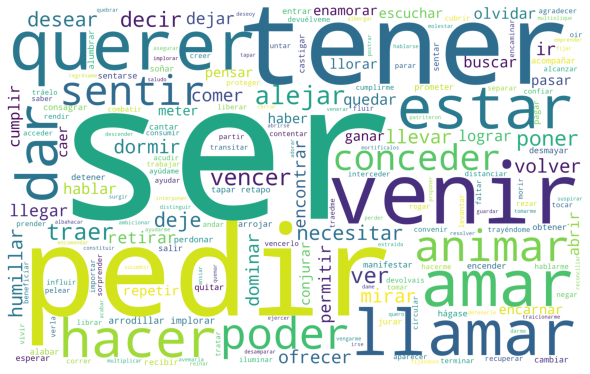

In [16]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('verbs.png',dpi=1000)
plt.show() 